<a href="https://colab.research.google.com/github/MaxKranewitter/MSc-WU/blob/main/SpotifyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
import os

# Path to wd
path = "/content/drive/MyDrive/fastText"

# Set wd
os.chdir(path)

# Check wd
os.getcwd()

'/content/drive/MyDrive/fastText'

In [ ]:
# Read Twitter file from Google Drive

import pandas as pd
import pyarrow.parquet as pq

df_twitter = pq.read_table('df.parquet', ).to_pandas()

df_twitter['date'] = pd.to_datetime(df_twitter['date'])

# Inspect dataframe df_Twitter
df_twitter.head()

In [4]:
print(df_twitter['date'].dtype)

datetime64[ns]


In [43]:
# Save sections of the Twitter df to inspect manually

# Set wd
import os

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

# Create dataframe
df_tw_export = df_twitter[(df_twitter['date'] >= '2020-05-25') & (df_twitter['date'] <= '2020-06-30')]

# Save dataframe to Google Drive
df_tw_export.to_csv('df_tw_export.csv', index = False)

In [ ]:
# Checking Twitter dataframe for artist tweets

df_tw_inspect = df_twitter[(df_twitter['spotify_artist_id'] == '5K4W6rqBFWDnAN6FQUkS6x') & (df_twitter['date'] >= '2020-06-30') & (df_twitter['date'] <= '2020-07-30')]

df_tw_inspect = df_tw_inspect.sort_values(by = 'date', ascending = True)

print(df_tw_inspect.head(25))

In [22]:
# Read Spotify file from Google Drive

import pandas as pd

file_path = '/content/drive/MyDrive/fastText/SpotifyData/tmp_ma_max_artist_success.csv.gz'
df_spotify = pd.read_csv(file_path, compression = 'gzip', header = 0, sep = ',', quotechar = '"')



# Inspect df_Spotify
df_spotify.head()

,spotify_artist_id,day,premium_streams,total_streams
0,08yf5A2nS4XEeNvabDXqyg,2020-11-24,18178.0,19496.0
1,0Mk6GS1Xr5tqlQyPNkMZzx,2019-03-04,173.0,177.0
2,6zFYqv1mOsgBRQbae3JJ9e,2017-01-20,21428.0,26379.0
3,2XnnxQzxFZG8qEPjakokPM,2020-04-29,4980.0,5553.0
4,3r17AfJCCUqC9Lf0OAc73G,2019-03-16,12484.0,13931.0


In [33]:
# Convert day to 'date'

# Convert the 'timestp' column to date format
df_spotify['date'] = pd.to_datetime(df_spotify['day'].str[:10], format='%Y-%m-%d')

# Inspect
print(df_spotify['date'].dtype)

datetime64[ns]


In [26]:
# Checking the Spotify dataframe for individual artists streaming data

df_spotify[df_spotify['spotify_artist_id'] == '0vUJ3QLN3MlRfjOc2LjGWp']

,spotify_artist_id,day,premium_streams,total_streams
7248,0vUJ3QLN3MlRfjOc2LjGWp,2019-07-04,150.0,158.0
10230,0vUJ3QLN3MlRfjOc2LjGWp,2020-09-23,420.0,467.0
11132,0vUJ3QLN3MlRfjOc2LjGWp,2019-08-13,31.0,33.0
16929,0vUJ3QLN3MlRfjOc2LjGWp,2020-10-09,456.0,496.0
32494,0vUJ3QLN3MlRfjOc2LjGWp,2020-01-25,738.0,803.0
...,...,...,...,...
5782419,0vUJ3QLN3MlRfjOc2LjGWp,2019-09-03,17.0,18.0
5785178,0vUJ3QLN3MlRfjOc2LjGWp,2020-07-24,721.0,789.0
5789562,0vUJ3QLN3MlRfjOc2LjGWp,2020-12-17,398.0,447.0
5805409,0vUJ3QLN3MlRfjOc2LjGWp,2021-03-11,372.0,418.0


In [25]:
# Merging the two dataframes crashes Colab
# Thus, I am extracting matching 'spotify_artist_id' first to save memory

# Extract the 'spotify_artist_id' columns from both dataframes

twitter_ids = df_twitter['spotify_artist_id'].unique()
spotify_ids = df_spotify['spotify_artist_id'].unique()

In [26]:
# Save the matching IDs as a list

matching_ids = set(twitter_ids).intersection(set(spotify_ids))
print(matching_ids)

{'1Bl6wpkWCQ4KVgnASpvzzA', '5q6z6GTth6lMbL9I8CAgby', '2cCUtGK9sDU2EoElnk0GNB', '1qqdO7xMptucPDMopsOdkr', '1UfzhwcOR4yfX7yHTPfC9m', '0N5PyKJzS3M1XNlaCL7bbE', '3NTbOmzlj2cL86XFuDVFvZ', '5cIc3SBFuBLVxJz58W2tU9', '2eRJjYEaWyGZbOBGYFLBoC', '5wPoxI5si3eJsYYwyXV4Wi', '0qlWcS66ohOIi0M8JZwPft', '6JOYrJkaS8ZKxLoUdNNdWr', '6XFQvBHGEr3mRfOHcqPXv8', '6biWAmrHyiMkX49LkycGqQ', '6futYSDVulYR2PktBjTB5W', '26OrZl5U3VNGHU9qUj8EcM', '0t3QQl52F463sxGXb1ckhB', '0NGAZxHanS9e0iNHpR8f2W', '2e4nwiX8ZCU09LGLOpeqTH', '0MGTHZpAGf7isSfw8yMIoi', '6v8FB84lnmJs434UJf2Mrm', '0VRj0yCOv2FXJNP47XQnx5', '3AuMNF8rQAKOzjYppFNAoB', '4YLtscXsxbVgi031ovDDdh', '3jksrX4oBklxR78ft8gv3j', '1ZsnHGOLYFg8CAHQQBc1ut', '5GxyeQagayzZOg4UwffQlD', '2Z9KL8Zmqx5Sg3cd7Fldhl', '5v61OSg53KaQxGMpErkBNp', '7GvVTb8yFV0ZrdI30Qce6T', '4AVFqumd2ogHFlRbKIjp1t', '74eY8wbrhhVD7pACbBHwHw', '239Y6QdFqVFfdsw6moqSEN', '1P6U1dCeHxPui5pIrGmndZ', '0x3PXj1WnuW7YsBxQK57xM', '6IRouO5mvvfcyxtPDKMYFN', '3bXhZFreBJF4QDUUiMmtZW', '44XzG6GoJZNtkIGW19hsUK', '3oLccEy7y6

In [ ]:
# Filter df_Twitter for matching IDs

df_twitter_filtered = df_twitter[df_twitter['spotify_artist_id'].isin(matching_ids)]
print(df_twitter_filtered)

In [ ]:
# Filter df_Spotify for matching IDs

df_spotify_filtered = df_spotify[df_spotify['spotify_artist_id'].isin(matching_ids)]
print(df_spotify_filtered)

In [29]:
# Checking the length of both dataframes

print(len(df_twitter_filtered), len(df_spotify_filtered))

# Spotify having more rows makes sense as Spotify collects the data daily, however,
# an artist may not tweet on a daily basis (thus, fewer rows).

3934831 5815793


In [ ]:
# Left join on artist ID and day

df_merged = df_spotify_filtered.merge(df_twitter_filtered, on = ['spotify_artist_id', 'date'], how = 'left')

df_merged = df_merged.sort_values(by = 'spotify_artist_id', ascending = True)

print(df_merged)

In [ ]:
# Create a mapping dataframe with unique 'spotify_artist_id' and 'twitter_handle' pairs

mapping_df = df_twitter_filtered[['spotify_artist_id', 'twitter_handle']].drop_duplicates()
print(mapping_df)

In [32]:
# Merge the mapping_df dataframe with the df_merged dataframe

df_merged = df_merged.merge(mapping_df, on = 'spotify_artist_id', how = 'left', suffixes=('', '_mapped'))

df_merged['twitter_handle'].fillna(df_merged['twitter_handle_mapped'], inplace=True)

df_merged.drop('twitter_handle_mapped', axis=1, inplace=True)

In [ ]:
print(df_merged)

In [ ]:
# Inspecting the data for one month as a sample

df_merged_jan_2021 = df_merged[(df_merged['date'] >= '2021-01-01') & (df_merged['date'] <= '2021-01-31')]
df_merged_jan_2021

In [35]:
# SAVE df_merged

# Set wd
import os

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

# Save dataframe to Google Drive
df_merged.to_csv('df_merged.csv.gz', index = False, compression = 'gzip')

In [38]:
# Alternatively, save as parquet

df_merged.to_parquet('df_merged.parquet', index = False)

In [3]:
# LOAD

import os
import pyarrow.parquet as pd

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

df_merged = pd.read_table('df_merged.parquet', ).to_pandas()

df_merged.head()

,spotify_artist_id,day,premium_streams,total_streams,date,cm_artist_id,twitter_handle,author_twitter_id,tweet_id,source,...,context_136,context_29,context_22,context_5,context_137,context_47,sentiment,sent_polarity,predicted_labels,labels
0,00XhexlJEXQstHimpZN910,2018-03-05,10.0,12.0,2018-03-05,NaN,brytiago,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None
1,00XhexlJEXQstHimpZN910,2020-07-12,2412.0,2755.0,2020-07-12,NaN,brytiago,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None
2,00XhexlJEXQstHimpZN910,2020-02-04,1382.0,1573.0,2020-02-04,NaN,brytiago,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None
3,00XhexlJEXQstHimpZN910,2021-07-03,1290.0,1554.0,2021-07-03,NaN,brytiago,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None
4,00XhexlJEXQstHimpZN910,2019-10-29,11.0,12.0,2019-10-29,NaN,brytiago,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,None,None


In [4]:
print(df_merged['date'].dtype)

datetime64[ns]


In [5]:
# Create a new dataframe that aggregates the number of tweets and streaming data for each artist
# The aggregation is for the entire time period!

import pandas as pd

df_aggregated = df_merged.groupby(['twitter_handle', 'spotify_artist_id']).agg(
    total_tweets = pd.NamedAgg(column = 'tweet_id', aggfunc = 'count'),
    total_premium_streams = pd.NamedAgg(column = 'premium_streams', aggfunc = 'sum'),
    total_streams = pd.NamedAgg(column = 'total_streams', aggfunc='sum')
).reset_index()

df_aggregated.head()

,twitter_handle,spotify_artist_id,total_tweets,total_premium_streams,total_streams
0,0pn,2wPDbhaGXCqROrVmwDdCrK,336,1192722.0,1281117.0
1,10000maniacs,0MBIKH9DjtBkv8O3nS6szj,407,1203437.0,1352528.0
2,10years,0REMf7H0VP6DwfZ9MbuWph,335,1913956.0,2244995.0
3,12stones,0DrXhci3WAyo0WJv1RBOG6,30,3188999.0,3745630.0
4,147calboy,0HkcYmcjrBR3SCw9Ld5VZk,415,207352.0,224118.0


In [6]:
# Top Tweeters: artists with the most tweets over the period

top_tweeters = df_aggregated[['twitter_handle', 'total_tweets']].sort_values(by = 'total_tweets', ascending = False)
print(top_tweeters.head(25))

       twitter_handle  total_tweets
27        670thescore         37685
1371   davidcoverdale         36949
2696      pelicansnba         21553
2797         rawkmama         21249
3229   thedavidcrosby         20604
3185          the1975         19660
1876   innercitypress         18053
128         BoyGeorge         16139
1992     johnholtnews         16087
1514              eff         15849
2894      ronsexsmith         14582
2593     oakridgeboys         14424
2846      richardmarx         14175
3587       yemialadee         14142
3186  theDandyWarhols         14129
2992       shadowtodd         13329
2503       myaplanet9         13207
753              Wale         12795
3394   tommiesunshine         12612
234        FINALLEVEL         11058
945     antonnewcombe         11044
419          MCHammer         10863
899      amandapalmer         10673
2675         pasports          9334
1447         djkhaled          9197


In [7]:
# Top Streamers: most total streams over the period

top_streamers = df_aggregated[['twitter_handle', 'total_streams']].sort_values(by = 'total_streams', ascending = False)
print(top_streamers.head(25))

       twitter_handle  total_streams
1511        edsheeran   2.558430e+09
69          AnneMarie   2.517523e+09
1447         djkhaled   2.383992e+09
228            Eminem   1.688043e+09
1769           halsey   1.671134e+09
1551        enosarris   1.597208e+09
2547       nickiminaj   1.460689e+09
2778       raderlehra   1.408368e+09
2053     justinbieber   1.388004e+09
3343        theweeknd   1.387989e+09
3244   thegreatkhalid   1.336037e+09
2042     juiceworlddd   1.291935e+09
211             Drake   1.264461e+09
27        670thescore   1.232693e+09
3259       thekidmero   1.152420e+09
2675         pasports   1.139393e+09
3185          the1975   1.135337e+09
143   CHANCETHERAPPER   1.124798e+09
2082        katyperry   1.119588e+09
625       ShawnMendes   1.107786e+09
2251       linkinpark   1.080379e+09
1297         coldplay   1.075921e+09
2045    juliamichaels   9.347096e+08
2069        kanyewest   9.228331e+08
403         LittleMix   9.065321e+08


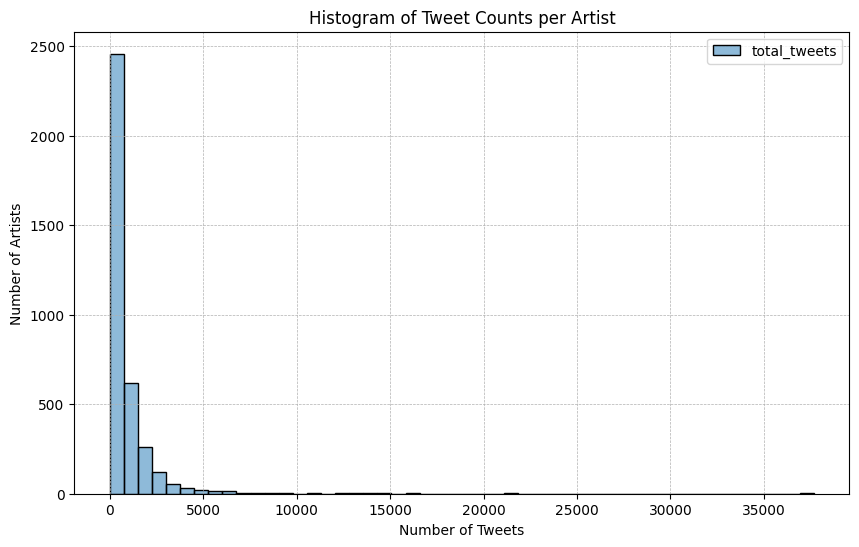

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize tweet counts via a histogram
plt.figure(figsize = (10, 6))
sns.histplot(top_tweeters, kde = False, bins = 50)
plt.title('Histogram of Tweet Counts per Artist')
plt.xlabel('Number of Tweets')
plt.ylabel('Number of Artists')
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)
plt.show()

In [9]:
# We'll do K-Means clustering to identify similar artists for the DiD method

# Steps for clustering
# 1) Data preprocessing: that's completed with the previous steps
# 2) Scaling: the range of metrics is different, this we scale them to make them comparable (mean of 0, SD of 1)
# 3) Clustering: via K-Means clustering
# 4) Visualize and evaluate

# 2) Scaling
# We need to scale/standardize the data

from sklearn.preprocessing import StandardScaler

columns_to_scale = ['total_tweets', 'total_premium_streams', 'total_streams']
data_to_scale = df_aggregated[columns_to_scale] # new df with only those columns

# Initialize Standard Scaler
scaler = StandardScaler()

# Fit and transform data
scaled_data = scaler.fit_transform(data_to_scale) # computes the mean and SD

# Convert scaled data back into a dataframe for better readability
scaled_df = pd.DataFrame(scaled_data, columns = columns_to_scale, index =
                         df_aggregated['twitter_handle'])

# Inspect
scaled_df.head()

,total_tweets,total_premium_streams,total_streams
twitter_handle,,,
0pn,-0.294919,-0.292844,-0.288750
10000maniacs,-0.255073,-0.292762,-0.288279
10years,-0.295481,-0.287299,-0.282390
12stones,-0.466653,-0.277497,-0.272487
147calboy,-0.250583,-0.300420,-0.295725


In [12]:
# 3) K-Means Clustering

from sklearn.cluster import KMeans

# Elbow method

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):   # loop from 1 to 10 to try different numbers of clusters
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(scaled_df)
    wcss.append(kmeans.inertia_)

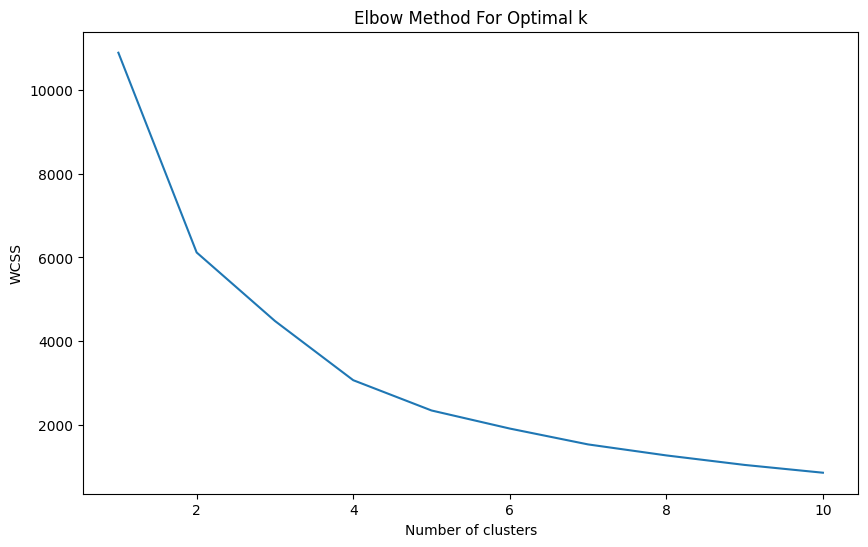

In [13]:
# Visualizing to observe the elbow and identify number of clusters

plt.figure(figsize = (10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# The WCSS starts to decrease at a slower rate after 4 clusters.
# Thus, we identify the elbow at 4 clusters.

In [16]:
# 3) K Means clustering

# Using 4 clusters

kmeans = KMeans(n_clusters = 4, random_state = 0) # using the K-Means algorith with 4 clusters
kmeans_clusters = kmeans.fit_predict(scaled_data) # contains the index of the cluster each artist belongs to

# Add cluster labels to original df_aggregated dataframe
df_aggregated['cluster'] = kmeans_clusters

# Inspect
df_aggregated.head() # now each artist has a designated cluster assigned to him/her

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,twitter_handle,spotify_artist_id,total_tweets,total_premium_streams,total_streams,cluster
0,0pn,2wPDbhaGXCqROrVmwDdCrK,336,1192722.0,1281117.0,0
1,10000maniacs,0MBIKH9DjtBkv8O3nS6szj,407,1203437.0,1352528.0,0
2,10years,0REMf7H0VP6DwfZ9MbuWph,335,1913956.0,2244995.0,0
3,12stones,0DrXhci3WAyo0WJv1RBOG6,30,3188999.0,3745630.0,0
4,147calboy,0HkcYmcjrBR3SCw9Ld5VZk,415,207352.0,224118.0,0


In [35]:
# Group clusters and compute mean for each feature to understand characteristics of each cluster

# We group by cluster and calculate the mean
cluster_summary = df_aggregated.groupby('cluster').mean(numeric_only = True)

# Renaming columns for clarity in cluster_summary (because we're using averages)
cluster_summary.rename(columns={
    'total_tweets': 'avg_total_tweets',
    'total_premium_streams': 'avg_total_premium_streams',
    'total_streams': 'avg_total_streams'
}, inplace=True)

print(cluster_summary)

# Evaluation:

         avg_total_tweets  avg_total_premium_streams  avg_total_streams
cluster                                                                
0              693.240943               1.476626e+07       1.671751e+07
1             3549.843750               1.086493e+09       1.267332e+09
2             1389.385475               3.109914e+08       3.563621e+08
3            15332.148148               7.956619e+07       9.367220e+07


In [17]:
# Examining a sample of artists within each cluster

artists_in_cluster = {}
for cluster_num in range(4):
    artists_sample = df_aggregated[df_aggregated['cluster'] == cluster_num].sample(5)['twitter_handle'].tolist()
    artists_in_cluster[cluster_num] = artists_sample

print(artists_in_cluster)

{0: ['officialaitch', 'lionbabe', 'robinthicke', 'therealtheband', 'merlehaggard'], 1: ['siggismallz', 'AnneMarie', 'linkinpark', 'juiceworlddd', 'CHANCETHERAPPER'], 2: ['u2', 'maluma', 'daddy_yankee', 'fimbim', 'meghan_trainor'], 3: ['FINALLEVEL', 'laus1507', 'antonnewcombe', 'johnholtnews', 'rawkmama']}


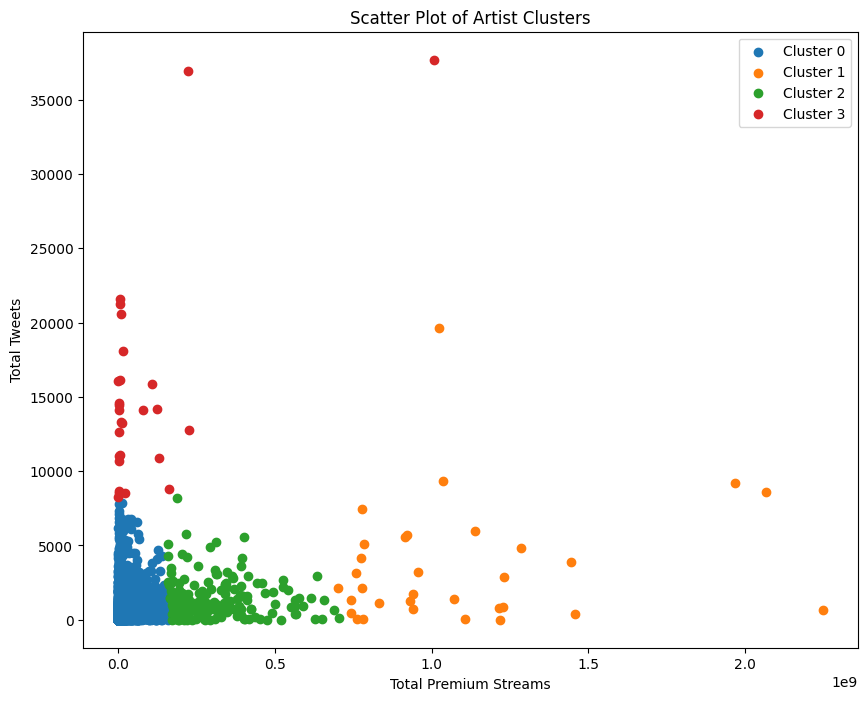

In [18]:
# Importing matplotlib for visualization
import matplotlib.pyplot as plt

# Visualizing the clusters using a scatter plot
plt.figure(figsize=(10, 8))

for cluster_num in range(4):
    subset = df_aggregated[df_aggregated['cluster'] == cluster_num]
    plt.scatter(subset['total_premium_streams'], subset['total_tweets'], label=f'Cluster {cluster_num}')

# Labels and title
plt.xlabel('Total Premium Streams')
plt.ylabel('Total Tweets')
plt.title('Scatter Plot of Artist Clusters')

plt.legend()
plt.show()

In [20]:
# Download the list of artists per cluster

# SAVE df_aggregated

# Set wd
import os

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

# Save dataframe to Google Drive
df_aggregated.to_csv('df_aggregated.csv', index = False)

In [ ]:
# MODEL-FREE EVIDENCE: Gun Violence

# Parkland high school shooting: 2018-02-14

# Treated Artist: Nancy Sinatra

target_ID = '3IZrrNonYELubLPJmqOci2'
target_date = pd.to_datetime('2018-02-14')

df_nancysinatra = df_spotify[(df_spotify['spotify_artist_id'] == '3IZrrNonYELubLPJmqOci2') & (df_spotify['date'] >= pd.to_datetime('2018-01-14')) & (df_spotify['date'] <= pd.to_datetime('2018-03-14'))]
df_nancysinatra = df_nancysinatra.sort_values(by = 'date', ascending = True)

print(df_nancysinatra)

In [ ]:
# Visualization Nancy Sinatra

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_nancysinatra['date'], df_nancysinatra['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_nancysinatra['date'], df_nancysinatra['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_dates = [pd.to_datetime(date) for date in ['2018-02-14', '2018-02-15', '2018-02-16', '2018-02-17', '2018-02-18']]

# Highlight each target date
for date in target_dates:
    plt.axvline(x = date, color = 'r', linestyle = '--', label = f"Event Date: {date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2018-02-14') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2018-02-14') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_nancysinatra[(df_nancysinatra['date'] >= seven_days_before) & (df_nancysinatra['date'] <= seven_days_after)]['date'],
         df_nancysinatra[(df_nancysinatra['date'] >= seven_days_before) & (df_nancysinatra['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_nancysinatra[(df_nancysinatra['date'] >= seven_days_before) & (df_nancysinatra['date'] <= seven_days_after)]['date'],
         df_nancysinatra[(df_nancysinatra['date'] >= seven_days_before) & (df_nancysinatra['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Nancy Sinatra")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Gun violence

# Parkland high school shooting: 2018-02-14

# Untreated Artist: Weezer

# Did not tweet about the Parkland HS shooting

df_weezer = df_spotify[(df_spotify['spotify_artist_id'] == '3jOstUTkEu2JkjvRdBA5Gu') & (df_spotify['date'] >= pd.to_datetime('2018-01-14')) & (df_spotify['date'] <= pd.to_datetime('2018-03-14'))]
df_weezer = df_weezer.sort_values(by = 'date', ascending = True)

print(df_weezer)

In [ ]:
# Visualization Weezer

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_weezer['date'], df_weezer['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_weezer['date'], df_weezer['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2018-02-14') # Day of Parkland HS shooting

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2018-02-14') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2018-02-14') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_weezer[(df_weezer['date'] >= seven_days_before) & (df_weezer['date'] <= seven_days_after)]['date'],
         df_weezer[(df_weezer['date'] >= seven_days_before) & (df_weezer['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_weezer[(df_weezer['date'] >= seven_days_before) & (df_weezer['date'] <= seven_days_after)]['date'],
         df_weezer[(df_weezer['date'] >= seven_days_before) & (df_weezer['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Weezer")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()


In [ ]:
# MODEL-FREE EVIDENCE: BLM

# George Floyd's Death 2020-05-25

# Treated Artist: DJ Khalid

df_djkhalid = df_spotify[(df_spotify['spotify_artist_id'] == '0QHgL1lAIqAw0HtD7YldmP') & (df_spotify['date'] >= pd.to_datetime('2020-04-28')) & (df_spotify['date'] <= pd.to_datetime('2020-06-28'))]
df_djkhalid = df_djkhalid.sort_values(by = 'date', ascending = True)

print(df_djkhalid)

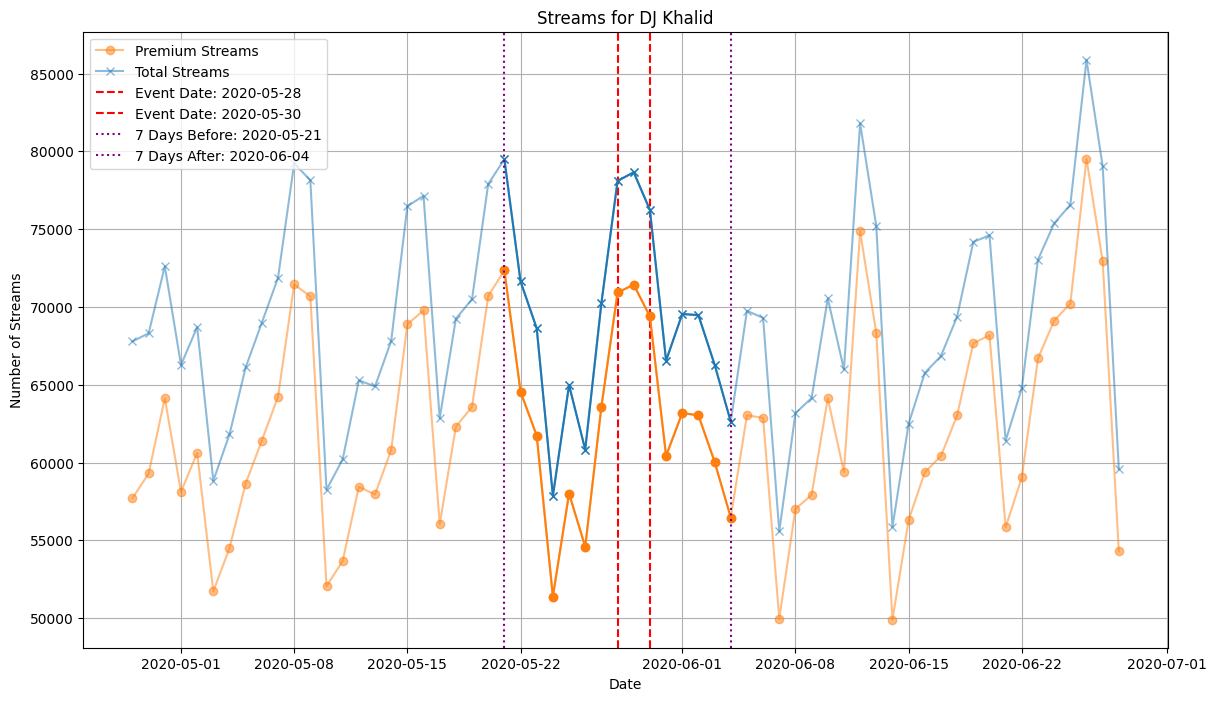

In [52]:
# Visualization DJ Khalid

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_djkhalid['date'], df_djkhalid['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_djkhalid['date'], df_djkhalid['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_dates = [pd.to_datetime(date) for date in ['2020-05-28', '2020-05-30']]

# Highlight each target date
for date in target_dates:
    plt.axvline(x = date, color = 'r', linestyle = '--', label = f"Event Date: {date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-05-28') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-05-28') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_djkhalid[(df_djkhalid['date'] >= seven_days_before) & (df_djkhalid['date'] <= seven_days_after)]['date'],
         df_djkhalid[(df_djkhalid['date'] >= seven_days_before) & (df_djkhalid['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_djkhalid[(df_djkhalid['date'] >= seven_days_before) & (df_djkhalid['date'] <= seven_days_after)]['date'],
         df_djkhalid[(df_djkhalid['date'] >= seven_days_before) & (df_djkhalid['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for DJ Khalid")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [54]:
# MODEL-FREE EVIDENCE: BLM

# George Floyd's Death 2020-05-25

# Untreated Artist: Kanye West

df_kanye = df_spotify[(df_spotify['spotify_artist_id'] == '5K4W6rqBFWDnAN6FQUkS6x') & (df_spotify['date'] >= pd.to_datetime('2020-04-25')) & (df_spotify['date'] <= pd.to_datetime('2020-06-25'))]
df_kanye = df_kanye.sort_values(by = 'date', ascending = True)

print(df_kanye)

              spotify_artist_id         day  premium_streams  total_streams  \
3718131  5K4W6rqBFWDnAN6FQUkS6x  2020-04-25         304207.0       330452.0   
3410931  5K4W6rqBFWDnAN6FQUkS6x  2020-04-26         264713.0       289946.0   
3023131  5K4W6rqBFWDnAN6FQUkS6x  2020-04-27         280113.0       306361.0   
2244444  5K4W6rqBFWDnAN6FQUkS6x  2020-04-28         275634.0       301296.0   
2676827  5K4W6rqBFWDnAN6FQUkS6x  2020-04-29         282248.0       308318.0   
...                         ...         ...              ...            ...   
4158355  5K4W6rqBFWDnAN6FQUkS6x  2020-06-21         282655.0       305661.0   
2997353  5K4W6rqBFWDnAN6FQUkS6x  2020-06-22         310741.0       336294.0   
3257945  5K4W6rqBFWDnAN6FQUkS6x  2020-06-23         324578.0       350573.0   
5320911  5K4W6rqBFWDnAN6FQUkS6x  2020-06-24         325882.0       352434.0   
5670591  5K4W6rqBFWDnAN6FQUkS6x  2020-06-25         332305.0       356982.0   

              date  
3718131 2020-04-25  
3410931 2

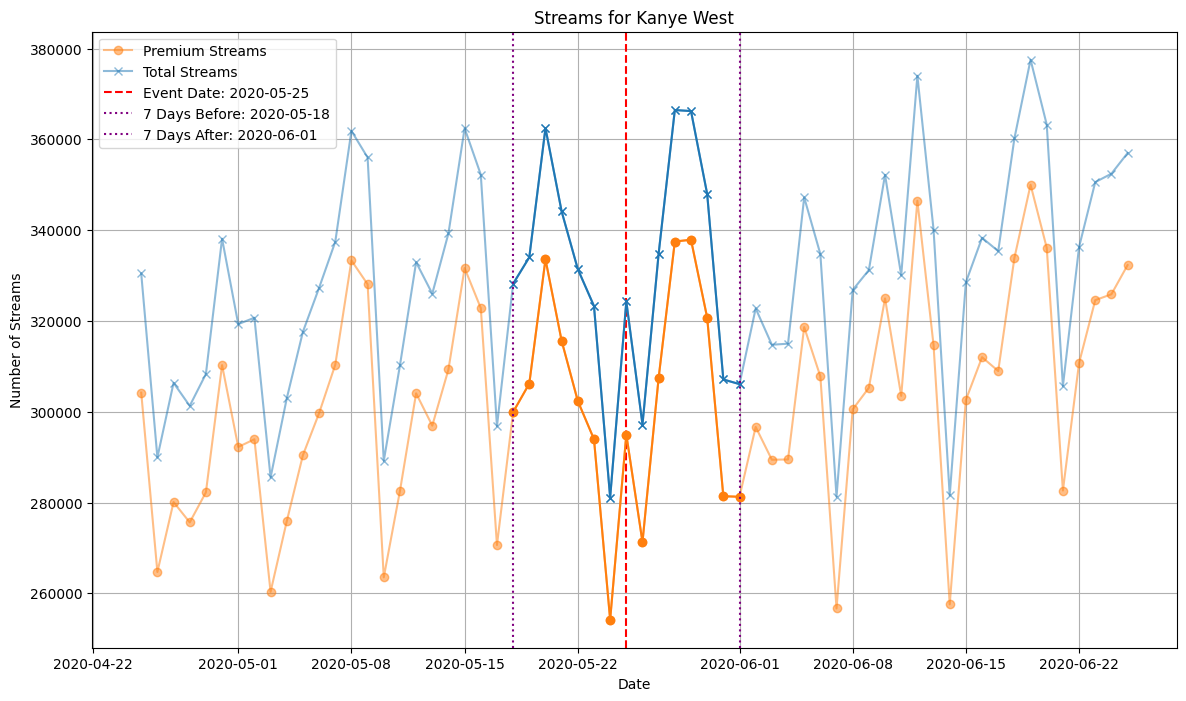

In [55]:
# Visualization Kanye West

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_kanye['date'], df_kanye['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_kanye['date'], df_kanye['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2020-05-25')

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-05-25') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-05-25') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_kanye[(df_kanye['date'] >= seven_days_before) & (df_kanye['date'] <= seven_days_after)]['date'],
         df_kanye[(df_kanye['date'] >= seven_days_before) & (df_kanye['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_kanye[(df_kanye['date'] >= seven_days_before) & (df_kanye['date'] <= seven_days_after)]['date'],
         df_kanye[(df_kanye['date'] >= seven_days_before) & (df_kanye['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Kanye West")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [58]:
# MODEL-FREE EVIDENCE: Check BLM related tweets

# Treated Artist: Amanda Palmer

df_amandapalmer = df_spotify[(df_spotify['spotify_artist_id'] == '726Dh6A5VyDfAAQxilT6A0') & (df_spotify['date'] >= pd.to_datetime('2020-05-02')) & (df_spotify['date'] <= pd.to_datetime('2020-07-02'))]
df_amandapalmer = df_amandapalmer.sort_values(by = 'date', ascending = True)

print(df_amandapalmer)

              spotify_artist_id         day  premium_streams  total_streams  \
1315588  726Dh6A5VyDfAAQxilT6A0  2020-05-02            186.0          209.0   
899139   726Dh6A5VyDfAAQxilT6A0  2020-05-03            168.0          189.0   
1873318  726Dh6A5VyDfAAQxilT6A0  2020-05-04            187.0          216.0   
1496032  726Dh6A5VyDfAAQxilT6A0  2020-05-05            160.0          180.0   
2634592  726Dh6A5VyDfAAQxilT6A0  2020-05-06            164.0          186.0   
...                         ...         ...              ...            ...   
4885279  726Dh6A5VyDfAAQxilT6A0  2020-06-28            188.0          204.0   
4497685  726Dh6A5VyDfAAQxilT6A0  2020-06-29            191.0          218.0   
634959   726Dh6A5VyDfAAQxilT6A0  2020-06-30            161.0          187.0   
1921564  726Dh6A5VyDfAAQxilT6A0  2020-07-01            179.0          202.0   
2203815  726Dh6A5VyDfAAQxilT6A0  2020-07-02            185.0          211.0   

              date  
1315588 2020-05-02  
899139  2

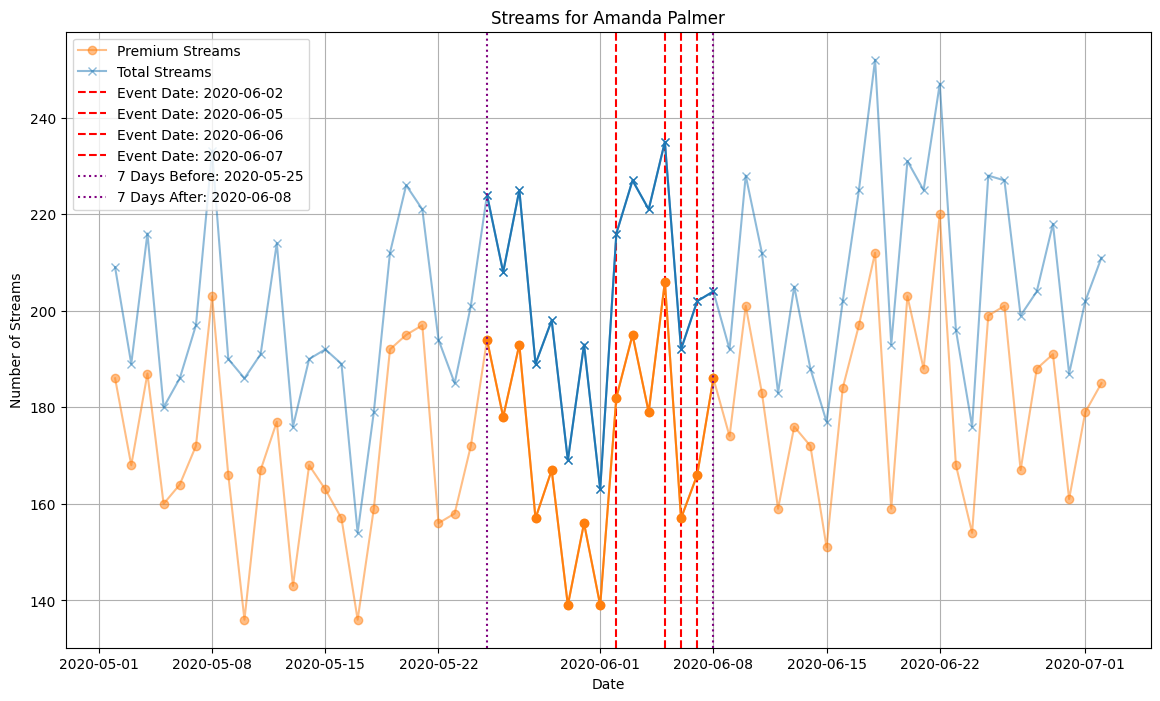

In [59]:
# Visualization Amanda Palmer

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_amandapalmer['date'], df_amandapalmer['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_amandapalmer['date'], df_amandapalmer['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_dates = [pd.to_datetime(date) for date in ['2020-06-02', '2020-06-05', '2020-06-06', '2020-06-07']]

# Highlight each target date
for date in target_dates:
    plt.axvline(x = date, color = 'r', linestyle = '--', label = f"Event Date: {date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-06-01') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-06-01') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_amandapalmer[(df_amandapalmer['date'] >= seven_days_before) & (df_amandapalmer['date'] <= seven_days_after)]['date'],
         df_amandapalmer[(df_amandapalmer['date'] >= seven_days_before) & (df_amandapalmer['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_amandapalmer[(df_amandapalmer['date'] >= seven_days_before) & (df_amandapalmer['date'] <= seven_days_after)]['date'],
         df_amandapalmer[(df_amandapalmer['date'] >= seven_days_before) & (df_amandapalmer['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Amanda Palmer")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [65]:
# MODEL-FREE EVIDENCE: Check BLM related tweets

# Untreated Artist: The Dandy Warhols

df_dandy = df_spotify[(df_spotify['spotify_artist_id'] == '7siPLyFwRFYQkKgWKJ5Sod') & (df_spotify['date'] >= pd.to_datetime('2020-04-25')) & (df_spotify['date'] <= pd.to_datetime('2020-06-25'))]

df_dandy = df_dandy.sort_values(by = 'date', ascending = True)

print(df_dandy)

              spotify_artist_id         day  premium_streams  total_streams  \
2560955  7siPLyFwRFYQkKgWKJ5Sod  2020-04-25           7743.0         8441.0   
1559888  7siPLyFwRFYQkKgWKJ5Sod  2020-04-26           6048.0         6640.0   
1958392  7siPLyFwRFYQkKgWKJ5Sod  2020-04-27           6027.0         6528.0   
4027615  7siPLyFwRFYQkKgWKJ5Sod  2020-04-28           5859.0         6458.0   
3763396  7siPLyFwRFYQkKgWKJ5Sod  2020-04-29           6103.0         6660.0   
...                         ...         ...              ...            ...   
2307471  7siPLyFwRFYQkKgWKJ5Sod  2020-06-21           6309.0         6817.0   
1829293  7siPLyFwRFYQkKgWKJ5Sod  2020-06-22           6339.0         6825.0   
1507594  7siPLyFwRFYQkKgWKJ5Sod  2020-06-23           6733.0         7245.0   
1269604  7siPLyFwRFYQkKgWKJ5Sod  2020-06-24           6678.0         7172.0   
1018813  7siPLyFwRFYQkKgWKJ5Sod  2020-06-25           6703.0         7220.0   

              date  
2560955 2020-04-25  
1559888 2

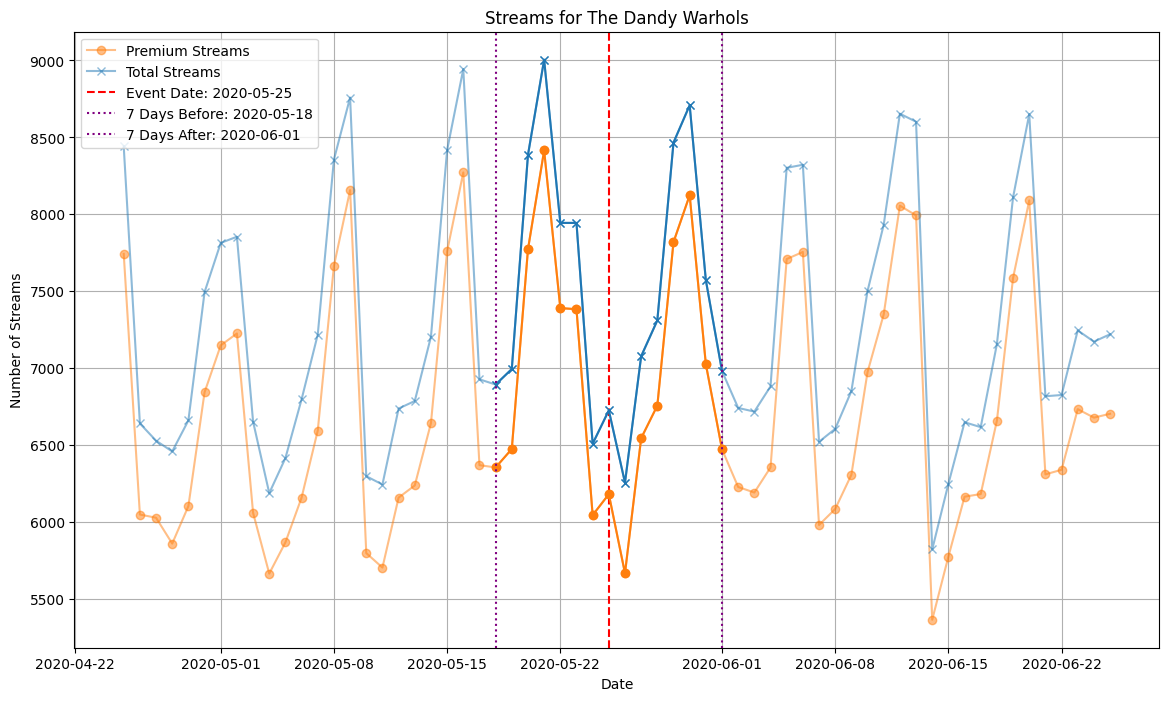

In [66]:
# Visualization The Dandy Warhols

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_dandy['date'], df_dandy['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_dandy['date'], df_dandy['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2020-05-25')

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-05-25') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-05-25') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_dandy[(df_dandy['date'] >= seven_days_before) & (df_dandy['date'] <= seven_days_after)]['date'],
         df_dandy[(df_dandy['date'] >= seven_days_before) & (df_dandy['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_dandy[(df_dandy['date'] >= seven_days_before) & (df_dandy['date'] <= seven_days_after)]['date'],
         df_dandy[(df_dandy['date'] >= seven_days_before) & (df_dandy['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for The Dandy Warhols")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check BLM related tweets

# Artist: Steve Aoki

target_ID = '77AiFEVeAVj2ORpC85QVJs'
target_date = pd.to_datetime('2020-06-01')

df_steveaoki = df_spotify[(df_spotify['spotify_artist_id'] == '77AiFEVeAVj2ORpC85QVJs') & (df_spotify['date'] >= pd.to_datetime('2020-05-01')) & (df_spotify['date'] <= pd.to_datetime('2020-07-01'))]
df_steveaoki = df_steveaoki.sort_values(by = 'date', ascending = True)


print(df_steveaoki)

In [ ]:
# Visualization Steve Aoki

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_steveaoki['date'], df_steveaoki['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_steveaoki['date'], df_steveaoki['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_dates = [pd.to_datetime(date) for date in ['2020-06-01', '2020-06-02', '2020-06-03']]

# Highlight each target date
for date in target_dates:
    plt.axvline(x = date, color = 'r', linestyle = '--', label = f"Event Date: {date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-06-01') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-06-01') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_steveaoki[(df_steveaoki['date'] >= seven_days_before) & (df_steveaoki['date'] <= seven_days_after)]['date'],
         df_steveaoki[(df_steveaoki['date'] >= seven_days_before) & (df_steveaoki['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_steveaoki[(df_steveaoki['date'] >= seven_days_before) & (df_steveaoki['date'] <= seven_days_after)]['date'],
         df_steveaoki[(df_steveaoki['date'] >= seven_days_before) & (df_steveaoki['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Steve Aoki")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check BLM related tweets

# Artist: Gorillaz

target_ID = '3AA28KZvwAUcZuOKwyblJQ'
target_date = pd.to_datetime('2020-06-02')

df_gorillaz = df_spotify[(df_spotify['spotify_artist_id'] == '3AA28KZvwAUcZuOKwyblJQ') & (df_spotify['date'] >= pd.to_datetime('2020-05-02')) & (df_spotify['date'] <= pd.to_datetime('2020-07-02'))]
df_gorillaz = df_gorillaz.sort_values(by = 'date', ascending = True)

print(df_gorillaz)

In [ ]:
# Visualization Gorillaz

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_gorillaz['date'], df_gorillaz['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_gorillaz['date'], df_gorillaz['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_dates = [pd.to_datetime(date) for date in ['2020-06-02', '2020-06-03', '2020-06-05']]

# Highlight each target date
for date in target_dates:
    plt.axvline(x = date, color = 'r', linestyle = '--', label = f"Event Date: {date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2020-06-02') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2020-06-02') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_gorillaz[(df_gorillaz['date'] >= seven_days_before) & (df_gorillaz['date'] <= seven_days_after)]['date'],
         df_gorillaz[(df_gorillaz['date'] >= seven_days_before) & (df_gorillaz['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_gorillaz[(df_gorillaz['date'] >= seven_days_before) & (df_gorillaz['date'] <= seven_days_after)]['date'],
         df_gorillaz[(df_gorillaz['date'] >= seven_days_before) & (df_gorillaz['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Gorillaz")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check Gun related tweets

# Parkland high school shooting: 2018-02-14

# Artist: Missio (US artists; 16.6K)

target_ID = '2HOMW1liAxI3URnEq95SMS'
target_date = pd.to_datetime('2018-02-15')

df_missio = df_spotify[(df_spotify['spotify_artist_id'] == '2HOMW1liAxI3URnEq95SMS') & (df_spotify['date'] >= pd.to_datetime('2018-01-15')) & (df_spotify['date'] <= pd.to_datetime('2018-03-15'))]
df_missio = df_missio.sort_values(by = 'date', ascending = True)

print(df_missio)

In [ ]:
# Visualization Missio

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_missio['date'], df_missio['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_missio['date'], df_missio['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2018-02-15') # On this day other artists tweeted about George Floyd

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2018-02-15') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2018-02-15') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_missio[(df_missio['date'] >= seven_days_before) & (df_missio['date'] <= seven_days_after)]['date'],
         df_missio[(df_missio['date'] >= seven_days_before) & (df_missio['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_missio[(df_missio['date'] >= seven_days_before) & (df_missio['date'] <= seven_days_after)]['date'],
         df_missio[(df_missio['date'] >= seven_days_before) & (df_missio['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Missio")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check US Capitol Riot related tweets

# U.S. Capitol Riots: 2021-01-06

# Artist: Yungblud

target_ID = '6Ad91Jof8Niiw0lGLLi3NW'
target_date = pd.to_datetime('2021-01-06')

df_yungblud = df_spotify[(df_spotify['spotify_artist_id'] == '6Ad91Jof8Niiw0lGLLi3NW') & (df_spotify['date'] >= pd.to_datetime('2020-12-06')) & (df_spotify['date'] <= pd.to_datetime('2021-02-06'))]
df_yungblud = df_yungblud.sort_values(by = 'date', ascending = True)

print(df_yungblud)

In [ ]:
# Visualization Yungblud

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_yungblud['date'], df_yungblud['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_yungblud['date'], df_yungblud['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2021-01-06') # day of US Capitol Riots

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2021-01-06') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2021-01-06') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_yungblud[(df_yungblud['date'] >= seven_days_before) & (df_yungblud['date'] <= seven_days_after)]['date'],
         df_yungblud[(df_yungblud['date'] >= seven_days_before) & (df_yungblud['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_yungblud[(df_yungblud['date'] >= seven_days_before) & (df_yungblud['date'] <= seven_days_after)]['date'],
         df_yungblud[(df_yungblud['date'] >= seven_days_before) & (df_yungblud['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Yungblud")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check US Capitol Riot related tweets

# U.S. Capitol Riots: 2021-01-06

# Artist: Lil Yachty

target_ID = '6icQOAFXDZKsumw3YXyusw'
target_date = pd.to_datetime('2021-01-06')

df_lilyachty = df_spotify[(df_spotify['spotify_artist_id'] == '6icQOAFXDZKsumw3YXyusw') & (df_spotify['date'] >= pd.to_datetime('2020-12-06')) & (df_spotify['date'] <= pd.to_datetime('2021-02-06'))]
df_lilyachty = df_lilyachty.sort_values(by = 'date', ascending = True)

print(df_lilyachty)

In [ ]:
# Visualization Lil Yachty

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_lilyachty['date'], df_lilyachty['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_lilyachty['date'], df_lilyachty['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2021-01-06') # day of US Capitol Riots

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2021-01-06') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2021-01-06') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_lilyachty[(df_lilyachty['date'] >= seven_days_before) & (df_lilyachty['date'] <= seven_days_after)]['date'],
         df_lilyachty[(df_lilyachty['date'] >= seven_days_before) & (df_lilyachty['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_lilyachty[(df_lilyachty['date'] >= seven_days_before) & (df_lilyachty['date'] <= seven_days_after)]['date'],
         df_lilyachty[(df_lilyachty['date'] >= seven_days_before) & (df_lilyachty['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for Lil Yachty")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# MODEL-FREE EVIDENCE: Check US Capitol Riot related tweets

# U.S. Capitol Riots: 2021-01-06

# Artist: One Republic

# Did NOT tweet about the riots

target_ID = '5Pwc4xIPtQLFEnJriah9YJ'
target_date = pd.to_datetime('2021-01-06')

df_onerepublic = df_spotify[(df_spotify['spotify_artist_id'] == '5Pwc4xIPtQLFEnJriah9YJ') & (df_spotify['date'] >= pd.to_datetime('2020-12-06')) & (df_spotify['date'] <= pd.to_datetime('2021-02-06'))]
df_onerepublic = df_onerepublic.sort_values(by = 'date', ascending = True)

print(df_onerepublic)

In [ ]:
# Visualization One Republic

import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))

color_premium = '#ff7f0e'
color_total = '#1f77b4'

# Plot premium streams
plt.plot(df_onerepublic['date'], df_onerepublic['premium_streams'], label='Premium Streams', marker='o',
         alpha = 0.5, color = color_premium)

# Plot total streams
plt.plot(df_onerepublic['date'], df_onerepublic['total_streams'], label='Total Streams', marker='x',
         alpha = 0.5, color = color_total)

# Highlight tweet dates

target_date = pd.to_datetime('2021-01-06') # day of US Capitol Riots

# Highlight each target date

plt.axvline(x=target_date, color='r', linestyle='--', label=f"Event Date: {target_date.strftime('%Y-%m-%d')}")

# 7-day windows before and after the initial tweet
seven_days_before = pd.to_datetime('2021-01-06') - pd.Timedelta(days=7)
seven_days_after = pd.to_datetime('2021-01-06') + pd.Timedelta(days=7)

# Highlight the window of interest with full color
plt.plot(df_onerepublic[(df_onerepublic['date'] >= seven_days_before) & (df_onerepublic['date'] <= seven_days_after)]['date'],
         df_onerepublic[(df_onerepublic['date'] >= seven_days_before) & (df_onerepublic['date'] <= seven_days_after)]['premium_streams'],
         marker='o', color = color_premium)

plt.plot(df_onerepublic[(df_onerepublic['date'] >= seven_days_before) & (df_onerepublic['date'] <= seven_days_after)]['date'],
         df_onerepublic[(df_onerepublic['date'] >= seven_days_before) & (df_onerepublic['date'] <= seven_days_after)]['total_streams'],
         marker='x', color = color_total)

# Add purple dotted lines to indicate 7-day windows
plt.axvline(x=seven_days_before, color='purple', linestyle=':', label=f"7 Days Before: {seven_days_before.strftime('%Y-%m-%d')}")
plt.axvline(x=seven_days_after, color='purple', linestyle=':', label=f"7 Days After: {seven_days_after.strftime('%Y-%m-%d')}")

plt.title("Streams for One Republic")
plt.xlabel('Date')
plt.ylabel('Number of Streams')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
# SKIP

# Just checking something

df_spotify[df_spotify['spotify_artist_id'] == '7EWU4FhUJM1sZQgQKdENeT']

In [ ]:
# SKIP

# Just checking something

df_twitter[df_twitter['spotify_artist_id'] == '5Sjj30aHCmKcM9SdVX7PBK']

In [9]:
# Create new dataframe with selected columns of interest

df_select = df_merged[['spotify_artist_id', 'twitter_handle', 'text', 'retweet_count', 'premium_streams', 'total_streams', 'reply_count', 'like_count', 'quote_count', 'date', 'source', 'labels']]
df_select.head()

,spotify_artist_id,twitter_handle,text,retweet_count,premium_streams,total_streams,reply_count,like_count,quote_count,date,source,labels
0,00XhexlJEXQstHimpZN910,brytiago,None,NaN,10.0,12.0,NaN,NaN,NaN,2018-03-05,None,None
1,00XhexlJEXQstHimpZN910,brytiago,None,NaN,2412.0,2755.0,NaN,NaN,NaN,2020-07-12,None,None
2,00XhexlJEXQstHimpZN910,brytiago,None,NaN,1382.0,1573.0,NaN,NaN,NaN,2020-02-04,None,None
3,00XhexlJEXQstHimpZN910,brytiago,None,NaN,1290.0,1554.0,NaN,NaN,NaN,2021-07-03,None,None
4,00XhexlJEXQstHimpZN910,brytiago,None,NaN,11.0,12.0,NaN,NaN,NaN,2019-10-29,None,None


In [42]:
len(df_select)

7540702

In [45]:
# SAVE df_select dataframe

# Set wd
import os

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

# Save dataframe to Google Drive
df_select.to_csv('df_select.csv.gz', index = False, compression = 'gzip')

In [ ]:
# RETRIEVE df_select dataframe

# Set wd
import os

# Path to wd
path = "/content/drive/MyDrive/fastText/SpotifyData"

# Set wd
os.chdir(path)

# Check wd
os.getcwd()

import pandas as pd

# Load dataframe
df_select = pd.read_csv('df_select.csv.gz', compression = 'gzip')

# Inspect
df_select.head()

In [52]:
import numpy as np

# Calculate the percentiles

percentiles = [1, 5, 10, 25, 50, 75, 90, 95, 99]
percentile_values = np.percentile(tweet_count, percentiles)

# Display percentiles
for p, value in zip(percentiles, percentile_values):
  print(f"{p}th percentile: {value}")

# Insight:
# I may select the 50th percentile as the cutoff and drop the artists who
# tweeted less than 397 times during the observation period.

1th percentile: 1.0
5th percentile: 5.0
10th percentile: 16.0
25th percentile: 98.0
50th percentile: 397.0
75th percentile: 1017.75
90th percentile: 2017.1999999999998
95th percentile: 2970.649999999999
99th percentile: 7214.399999999967


In [54]:
# Let's make the df_select smaller by only looking at frequently tweeting artists
# We take the 50th percentile as cutoff and only look at artists who tweeted
# 397 tweets or more during the observation period.

active_artists = tweet_count[tweet_count >= 397].index.tolist()
len(active_artists)     # 1776 artists that tweeted >= 509 times

1776

In [55]:
# Filter df_select for those frequently tweeting artists

df_select_active = df_select[df_select['twitter_handle'].isin(active_artists)]

df_select_active['date'] = pd.to_datetime(df_select_active['date'])

print(df_select_active)

              spotify_artist_id twitter_handle  \
1832     00YTqRClk82aMchQQpYMd5        olnband   
1833     00YTqRClk82aMchQQpYMd5        olnband   
1834     00YTqRClk82aMchQQpYMd5        olnband   
1835     00YTqRClk82aMchQQpYMd5        olnband   
1836     00YTqRClk82aMchQQpYMd5        olnband   
...                         ...            ...   
7537139  7zm3aSdmGiOkTt0aZFSO8R       waxmotif   
7537140  7zm3aSdmGiOkTt0aZFSO8R       waxmotif   
7537141  7zm3aSdmGiOkTt0aZFSO8R       waxmotif   
7537142  7zm3aSdmGiOkTt0aZFSO8R       waxmotif   
7537143  7zm3aSdmGiOkTt0aZFSO8R       waxmotif   

                                                      text  retweet_count  \
1832     we cant wait for the selective hearing europea...           28.0   
1833                                                   NaN            NaN   
1834     europe tickets are going fast and the vip upgr...           26.0   
1835                                                   NaN            NaN   
1836          

<ipython-input-55-f26a9b18728d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select_active['date'] = pd.to_datetime(df_select_active['date'])


In [56]:
# SAVE df_select_active dataframe

# Set wd
import os

# Path to wd
path = '/content/drive/MyDrive/fastText/SpotifyData'

# Set wd
os.chdir(path)

# Save dataframe to Google Drive
df_select_active.to_csv('df_select_active.csv.gz', index = False, compression = 'gzip')

In [ ]:
# RETRIEVE df_select_active dataframe

# Set wd
import os

# Path to wd
path = "/content/drive/MyDrive/fastText/SpotifyData"

# Set wd
os.chdir(path)

import pandas as pd

# Load dataframe
df_select_active = pd.read_csv('df_select_active.csv.gz', compression = 'gzip')

# Convert 'date' column to datetime format
df_select_active['date'] = pd.to_datetime(df_select_active['date'])

# Inspect
df_select_active.head()

In [57]:
# Model-Free Evidence

# Create a list of notable events and matching dates

dates = ['2017-08-11', '2017-10-01', '2018-02-14', '2020-02-23', '2020-03-13', '2020-05-25', '2020-11-03', '2021-01-06', '2021-01-20', '2022-02-24', '2022-05-24',
         '2022-06-24']
events = ['White Nationalist Rallye', 'Las Vegas Shooting', 'Parkland School Shooting', 'Killing Ahmaud Arbery', 'Killing Breonna Taylor', 'Killing George Floyd',
          'U.S. Pres. Election', 'U.S. Capital Riots', 'Inauguration Joe Biden', 'Ukraine War', 'Uvalde School Shooting', 'Roe v. Wade']

In [58]:
# Create a table of notable controversial events

events_table = pd.DataFrame({
    'Date': dates,
    'Event': events
})

events_table['Date'] = pd.to_datetime(events_table['Date'])

print(events_table)

         Date                     Event
0  2017-08-11  White Nationalist Rallye
1  2017-10-01        Las Vegas Shooting
2  2018-02-14  Parkland School Shooting
3  2020-02-23     Killing Ahmaud Arbery
4  2020-03-13    Killing Breonna Taylor
5  2020-05-25      Killing George Floyd
6  2020-11-03       U.S. Pres. Election
7  2021-01-06        U.S. Capital Riots
8  2021-01-20    Inauguration Joe Biden
9  2022-02-24               Ukraine War
10 2022-05-24    Uvalde School Shooting
11 2022-06-24               Roe v. Wade
